In [149]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [150]:
print("hello world!")

hello world!


# 1. Loading the dataset to dataframe

In [151]:
import os
import pandas as pd

df = pd.read_excel("Cineplex Case Study Data 2019.xlsx") 
#housing_label = housing.loc[:,"median_house_value"]
#housing = housing.drop("median_house_value",axis=1)

In [152]:
df.head()

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,COLLECTOR_TIER,ENROLLMENT_DATE,BIRTHDATE,GENDER,LANGUAGE,HOUSEHOLD_INCOME_CATEGORY,HOME_ADDRESS_CITY,HOME_ADDRESS_PROVINCE_CODE,...,LAST_RATIO_CHG_DATE,EMAIL_OPT_IN_FLAG,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,DATE_OF_RESPONSE,CONTROL_FLAG,TEST_ACCOUNT_FLAG
0,14089420521,A,O,1997-04-11,1973-06-10 00:00:00,F,E,-1,KESWICK RIDGE,NB,...,2014-06-02,Y,3788,1353,1.0,1.0,Y,2018-02-28,N,N
1,18507021933,A,B,2013-05-03,1994-05-23 00:00:00,F,E,0,MARKHAM,ON,...,2019-07-19,Y,20,1,1.0,0.0,Y,2018-02-26,N,Y
2,15139470171,A,B,2015-07-14,1996-05-05 00:00:00,F,E,-1,SCARBOROUGH,ON,...,2015-07-14,Y,23,6,0.0,1.0,Y,2018-02-20,N,N
3,12883629783,A,B,2015-07-14,1996-05-05 00:00:00,F,E,-1,SCARBOROUGH,ON,...,2015-07-14,Y,23,6,0.0,1.0,Y,2018-02-24,N,N
4,12371682557,A,G,2017-07-26,1978-07-07 00:00:00,F,E,-1,VICTORIA,BC,...,2017-07-27,Y,150,732,0.0,0.0,Y,2018-02-26,N,N


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8598 entries, 0 to 8597
Data columns (total 26 columns):
UNIQUE_COLLECTOR_ID           8598 non-null int64
ACCOUNT_STATUS                8598 non-null object
COLLECTOR_TIER                8598 non-null object
ENROLLMENT_DATE               8598 non-null datetime64[ns]
BIRTHDATE                     8598 non-null object
GENDER                        6723 non-null object
LANGUAGE                      8598 non-null object
HOUSEHOLD_INCOME_CATEGORY     8598 non-null int64
HOME_ADDRESS_CITY             8598 non-null object
HOME_ADDRESS_PROVINCE_CODE    8598 non-null object
HOME_ADDRESS_REGION_CODE      8598 non-null object
PROMO_MAILABLE_FLAG           8598 non-null object
ACCOUNT_BALANCE               8598 non-null int64
DREAM_ACCOUNT_BALANCE         8598 non-null int64
CASH_ACCOUNT_BALANCE          8598 non-null int64
CASH_RATIO                    8598 non-null int64
LAST_RATIO_CHG_DATE           6006 non-null datetime64[ns]
EMAIL_OPT_IN_FLA

In [154]:
print(df.shape)

(8598, 26)


# 2. Discovering and visualizing data 

In [155]:
##Convert RESPONDENT from Y/N to 1/0
df['RESPONDENT'] = df['RESPONDENT'].map({'Y': 1, 'N': 0})

##Change data type
df["HOME_ADDRESS_REGION_CODE"]=df["HOME_ADDRESS_REGION_CODE"].astype('category')
df["HOME_ADDRESS_REGION_CODE"]=df["HOME_ADDRESS_REGION_CODE"].astype('category')
df["HOME_ADDRESS_CITY"]=df["HOME_ADDRESS_CITY"].astype('category')
df["HOME_ADDRESS_PROVINCE_CODE"]=df["HOME_ADDRESS_PROVINCE_CODE"].astype('category')
df["COLLECTOR_TIER"]=df["COLLECTOR_TIER"].astype('category')
df['ACCOUNT_STATUS'] = df['ACCOUNT_STATUS'].map({'A': 1, 'I': 0})
df['LANGUAGE'] = df['LANGUAGE'].map({'E': 1, 'F': 0})
df['PROMO_MAILABLE_FLAG'] = df['PROMO_MAILABLE_FLAG'].map({'Y': 1, 'N': 0})
df['CONTROL_FLAG'] = df['CONTROL_FLAG'].map({'Y': 1, 'N': 0})


df['RESPONDENT'].value_counts()

0    7998
1     600
Name: RESPONDENT, dtype: int64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8598 entries, 0 to 8597
Data columns (total 26 columns):
UNIQUE_COLLECTOR_ID           8598 non-null int64
ACCOUNT_STATUS                8598 non-null int64
COLLECTOR_TIER                8598 non-null category
ENROLLMENT_DATE               8598 non-null datetime64[ns]
BIRTHDATE                     8598 non-null object
GENDER                        6723 non-null object
LANGUAGE                      8598 non-null int64
HOUSEHOLD_INCOME_CATEGORY     8598 non-null int64
HOME_ADDRESS_CITY             8598 non-null category
HOME_ADDRESS_PROVINCE_CODE    8598 non-null category
HOME_ADDRESS_REGION_CODE      8598 non-null category
PROMO_MAILABLE_FLAG           8598 non-null int64
ACCOUNT_BALANCE               8598 non-null int64
DREAM_ACCOUNT_BALANCE         8598 non-null int64
CASH_ACCOUNT_BALANCE          8598 non-null int64
CASH_RATIO                    8598 non-null int64
LAST_RATIO_CHG_DATE           6006 non-null datetime64[ns]
EMAIL_OPT_I

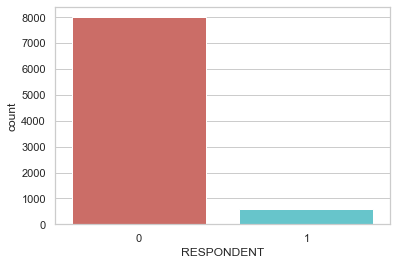

In [157]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.countplot(x='RESPONDENT',data=df,palette='hls')
plt.show()

In [158]:
count_no_resp = len(df[df['RESPONDENT']==0])
count_resp = len(df[df['RESPONDENT']==1])
pct_of_no_resp = count_no_resp/(count_no_resp+count_resp)
print("percentage of no respondent is", pct_of_no_resp*100)
pct_of_resp = count_resp/(count_no_resp+count_resp)
print("percentage of respondent", pct_of_resp*100)

percentage of no respondent is 93.02163293789253
percentage of respondent 6.978367062107467


In [159]:
df.groupby('RESPONDENT').mean()

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,LANGUAGE,HOUSEHOLD_INCOME_CATEGORY,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,CONTROL_FLAG
RESPONDENT,,,,,,,,,,,,,,
0,1.450694e+10,0.9995,0.907352,0.177294,0.976494,3828.162166,3481.000875,347.161290,44.759940,541.310578,345.139660,0.385100,0.777986,0.030258
1,1.450187e+10,1.0000,0.895000,-0.008333,0.980000,3877.928333,3543.161667,334.766667,45.966667,512.781667,333.716667,0.397329,0.745763,0.041667


#### Observations:
- The average income of collectors who responsed is lower than that of collectors who didn't.
- The average account balance/dream miles balance of collectors who responsed is higher than that of collectors who didn't.
- Collectors who responsed is more active on websites for the past 30 days.
- Surprisingly, collectors who responsed have a higher cash ratios

In [160]:
df.groupby('HOUSEHOLD_INCOME_CATEGORY').mean()

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,LANGUAGE,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,CONTROL_FLAG
HOUSEHOLD_INCOME_CATEGORY,,,,,,,,,,,,,,
-1,1.452413e+10,0.999229,0.904413,0.976296,3562.855078,3232.913856,329.941222,46.097514,494.064560,320.018115,0.359199,0.764350,0.072268,0.034689
0,1.451126e+10,1.000000,0.871914,0.983025,2254.424383,1909.282407,345.141975,56.080247,309.834877,197.425926,0.335404,0.715008,0.097222,0.024691
1,1.447458e+10,1.000000,0.902047,0.964912,3753.618421,3415.181287,338.437135,45.511696,477.998538,298.343567,0.380882,0.779180,0.061404,0.030702
2,1.448590e+10,1.000000,0.911236,0.973034,4109.628090,3700.791011,408.837079,41.932584,594.004494,384.968539,0.426954,0.816351,0.068539,0.032584
3,1.441837e+10,1.000000,0.916393,0.985246,5213.837705,4769.268852,444.568852,37.491803,780.350820,446.365574,0.472817,0.820339,0.049180,0.013115
4,1.450662e+10,1.000000,0.951473,0.984402,6222.514731,5918.882149,303.632582,32.426343,937.552860,612.095321,0.532986,0.827338,0.050260,0.022530


In [161]:
df.groupby('GENDER').mean()

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,LANGUAGE,HOUSEHOLD_INCOME_CATEGORY,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,CONTROL_FLAG
GENDER,,,,,,,,,,,,,,,
F,1.452639e+10,0.999765,0.893662,0.125352,0.976291,3415.733568,3124.977465,290.756103,46.546948,482.755399,315.781455,0.377278,0.762712,0.072535,0.029812
M,1.453964e+10,0.999188,0.922858,0.396671,0.978076,4531.300853,4081.102720,450.198132,43.012586,650.677629,416.793747,0.404996,0.796464,0.066179,0.030451


In [162]:
df.groupby('HOME_ADDRESS_REGION_CODE').mean()

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,LANGUAGE,HOUSEHOLD_INCOME_CATEGORY,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,CONTROL_FLAG
HOME_ADDRESS_REGION_CODE,,,,,,,,,,,,,,,
A,1.443790e+10,0.999171,0.980116,0.105220,0.973488,4026.007457,3751.055510,274.951947,47.183099,598.033969,457.305717,0.437240,0.786486,0.065452,0.028169
O,1.452779e+10,0.999719,0.993251,0.064961,0.977784,3323.766029,2883.634421,440.131609,49.516310,451.337739,293.696007,0.358175,0.765725,0.070304,0.031215
Q,1.458675e+10,0.999018,0.265226,0.024558,0.984283,2176.321218,1799.728880,376.592338,62.956778,340.504912,262.714145,0.249503,0.744111,0.074656,0.022593
W,1.448027e+10,0.999645,0.997160,0.365637,0.974086,4987.646432,4740.181044,247.465389,31.398651,697.072417,389.372737,0.448103,0.794987,0.069223,0.035144


In [163]:
df.groupby('COLLECTOR_TIER').mean()

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,LANGUAGE,HOUSEHOLD_INCOME_CATEGORY,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,CONTROL_FLAG
COLLECTOR_TIER,,,,,,,,,,,,,,,
B,1.452097e+10,0.999558,0.887318,-0.026293,0.970835,1324.305347,1182.949403,141.355943,53.157313,78.783915,30.606054,0.184787,0.692403,0.072028,0.031374
G,1.451590e+10,0.999653,0.919237,0.261005,0.980936,4247.766724,3727.185789,520.580936,42.301560,571.745927,403.498094,0.513561,0.835011,0.072097,0.033969
O,1.442906e+10,0.999158,0.948610,0.656276,0.989048,12380.610783,11676.480202,704.130581,19.326032,2216.518955,1396.834035,0.834739,0.924061,0.055602,0.022746


In [164]:
df.groupby('ACCOUNT_STATUS').mean()

,UNIQUE_COLLECTOR_ID,LANGUAGE,HOUSEHOLD_INCOME_CATEGORY,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,CONTROL_FLAG
ACCOUNT_STATUS,,,,,,,,,,,,,,
0,1.364872e+10,0.750000,-1.000000,0.000000,30.250000,14.25000,16.000000,50.00000,373.250000,224.250000,0.000000,0.500000,0.000000,0.000000
1,1.450698e+10,0.906563,0.164882,0.977193,3833.404352,3486.95427,346.450081,44.84175,539.397021,344.398418,0.386095,0.775987,0.069816,0.031068


Text(0, 0.5, 'Number of Respondents')

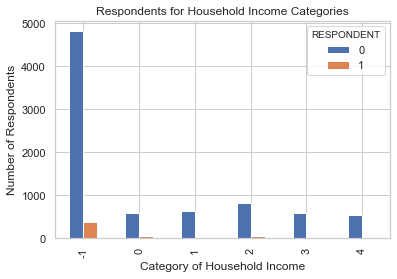

In [165]:
%matplotlib inline
pd.crosstab(df.HOUSEHOLD_INCOME_CATEGORY,df.RESPONDENT).plot(kind='bar')
plt.title('Respondents for Household Income Categories')
plt.xlabel('Category of Household Income')
plt.ylabel('Number of Respondents')
#plt.savefig('Account_Balance_and_Income')

<function matplotlib.pyplot.show(*args, **kw)>

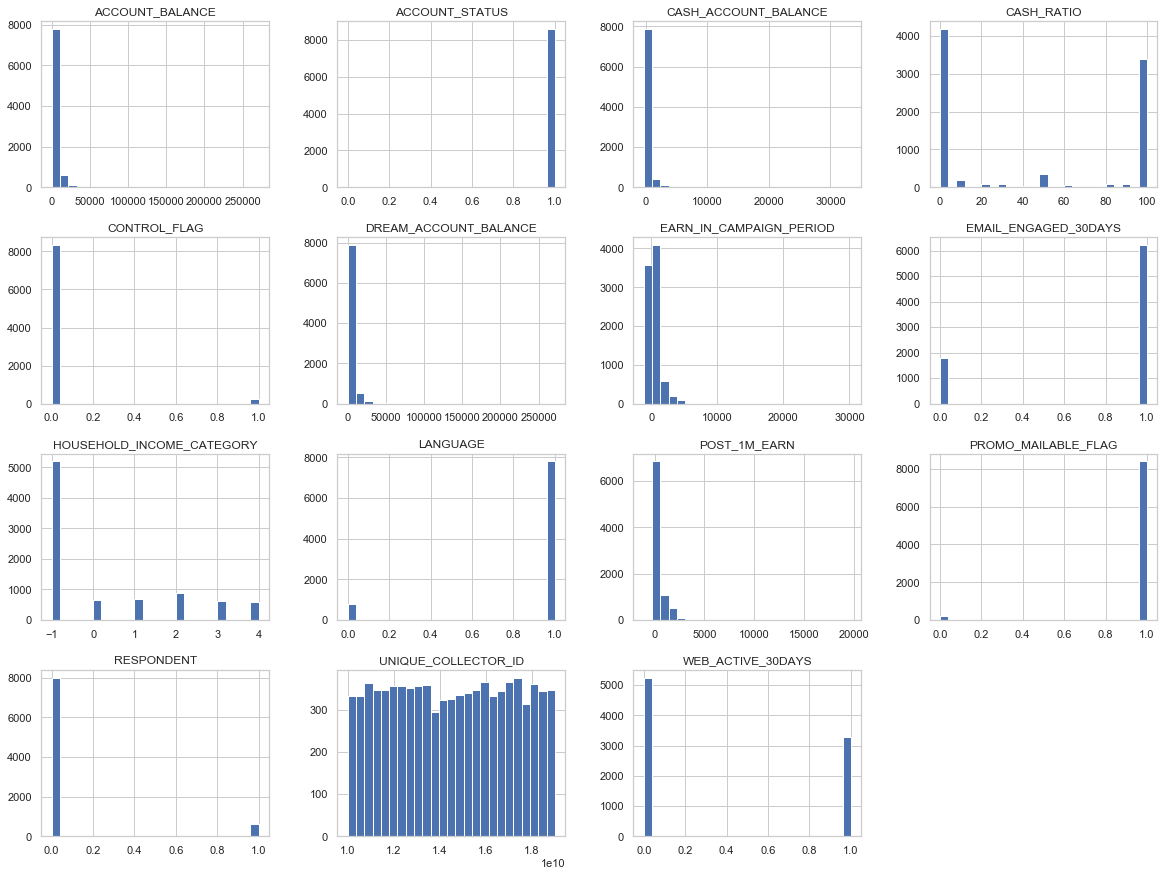

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=25,figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show

# 3. Data cleaning

## 3.1 Dealing with missing values and outliers

In [204]:
## Dealing with missing features (GENDER,EMAIL_OPT_IN_FLAG, WEB_ACTIVE_30DAYS, EMAIL_ENGAGED_30DAY)
df_dropna=df.dropna(subset=["GENDER"])
df_dropna=df_dropna.dropna(subset=["EMAIL_ENGAGED_30DAYS"])
df_dropna=df_dropna.dropna(subset=["WEB_ACTIVE_30DAYS"])
df_dropna=df_dropna.dropna(subset=["EMAIL_OPT_IN_FLAG"])
#df_dropna=df_dropna[(df_dropna['TEST_ACCOUNT_FLAG'] == "N")]

#Remove outliers of BIRTHDATE 
df_dropna=df_dropna[(df_dropna["BIRTHDATE"]!='0001-01-01') & (df_dropna['TEST_ACCOUNT_FLAG'] == "N")]
#Remove all test account data (2 accounts) 
df_dropna=df_dropna.drop("TEST_ACCOUNT_FLAG",axis=1)
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 8597
Data columns (total 25 columns):
UNIQUE_COLLECTOR_ID           6158 non-null int64
ACCOUNT_STATUS                6158 non-null int64
COLLECTOR_TIER                6158 non-null category
ENROLLMENT_DATE               6158 non-null datetime64[ns]
BIRTHDATE                     6158 non-null object
GENDER                        6158 non-null object
LANGUAGE                      6158 non-null int64
HOUSEHOLD_INCOME_CATEGORY     6158 non-null int64
HOME_ADDRESS_CITY             6158 non-null category
HOME_ADDRESS_PROVINCE_CODE    6158 non-null category
HOME_ADDRESS_REGION_CODE      6158 non-null category
PROMO_MAILABLE_FLAG           6158 non-null int64
ACCOUNT_BALANCE               6158 non-null int64
DREAM_ACCOUNT_BALANCE         6158 non-null int64
CASH_ACCOUNT_BALANCE          6158 non-null int64
CASH_RATIO                    6158 non-null int64
LAST_RATIO_CHG_DATE           4422 non-null datetime64[ns]
EMAIL_OPT_I

In [205]:
df_dropna.loc[df_dropna['BIRTHDATE']=='0001-01-01','BIRTHDATE']

Series([], Name: BIRTHDATE, dtype: object)

## 3.2 Changing data types

In [206]:
## Converting data types
df_dropna["HOUSEHOLD_INCOME_CATEGORY"]=df_dropna["HOUSEHOLD_INCOME_CATEGORY"].astype('category')
df_dropna["WEB_ACTIVE_30DAYS"]=df_dropna["WEB_ACTIVE_30DAYS"].astype('int64')
df_dropna["EMAIL_ENGAGED_30DAYS"]=df_dropna["EMAIL_ENGAGED_30DAYS"].astype('int64')

##Converting dummy variables: 
#df_dropna['RESPONDENT'] = df_dropna['RESPONDENT'].map({'Y': 1, 'N': 0})
df_dropna['GENDER'] = df_dropna['GENDER'].map({'F': 0, 'M': 1})

df_dropna['EMAIL_OPT_IN_FLAG'] = df_dropna['EMAIL_OPT_IN_FLAG'].map({'Y': 1, 'N': 0})

In [207]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 8597
Data columns (total 25 columns):
UNIQUE_COLLECTOR_ID           6158 non-null int64
ACCOUNT_STATUS                6158 non-null int64
COLLECTOR_TIER                6158 non-null category
ENROLLMENT_DATE               6158 non-null datetime64[ns]
BIRTHDATE                     6158 non-null object
GENDER                        6158 non-null int64
LANGUAGE                      6158 non-null int64
HOUSEHOLD_INCOME_CATEGORY     6158 non-null category
HOME_ADDRESS_CITY             6158 non-null category
HOME_ADDRESS_PROVINCE_CODE    6158 non-null category
HOME_ADDRESS_REGION_CODE      6158 non-null category
PROMO_MAILABLE_FLAG           6158 non-null int64
ACCOUNT_BALANCE               6158 non-null int64
DREAM_ACCOUNT_BALANCE         6158 non-null int64
CASH_ACCOUNT_BALANCE          6158 non-null int64
CASH_RATIO                    6158 non-null int64
LAST_RATIO_CHG_DATE           4422 non-null datetime64[ns]
EMAIL_OPT

In [208]:
df_dropna['RESPONDENT'].value_counts()

0    5744
1     414
Name: RESPONDENT, dtype: int64

## 3.3 Populating additional numerical features (AGE, YEARS_OF_ENROLL) catogerical features (AGE_CAT, YEARS_OF_ENROLL_CAT;)

In [25]:
##Convert datatype of BIRTHDATE
from datetime import datetime
#df["BIRTHDATE"] = pd.to_datetime(df["BIRTHDATE"])
df_dropna["BIRTHDATE"] = pd.to_datetime(df_dropna["BIRTHDATE"])

In [26]:
from dateutil.relativedelta import relativedelta
a= datetime.strptime('May 15, 2017, 00:00:00',"%B %d, %Y, %H:%M:%S")
df_dropna["AGE"] = [relativedelta(a, i).years for i in df_dropna["BIRTHDATE"]]

In [27]:
df_dropna["YEARS_OF_ENROLL"] = [relativedelta(a, i).years for i in df_dropna["ENROLLMENT_DATE"]]

In [28]:
df_dropna.describe()

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,GENDER,LANGUAGE,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EMAIL_OPT_IN_FLAG,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,CONTROL_FLAG,AGE,YEARS_OF_ENROLL
count,6.158000e+03,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.0,6158.000000,6158.000000,6158.000000,6158.000000,6158.00000,6158.000000,6158.000000,6158.000000
mean,1.452869e+10,0.999675,0.369113,0.905651,0.978077,4017.920429,3652.958103,364.962325,44.952907,1.0,577.588665,375.094511,0.406788,0.777038,0.06723,0.029717,42.455018,13.684475
std,2.605354e+09,0.018020,0.482604,0.292337,0.146443,8350.561556,8225.860460,1255.986411,47.384981,0.0,1180.714415,698.968168,0.491275,0.416267,0.25044,0.169820,10.701185,7.695141
min,1.000120e+10,0.000000,0.000000,0.000000,0.000000,-312.000000,0.000000,-312.000000,0.000000,1.0,-1145.000000,-1079.000000,0.000000,0.000000,0.00000,0.000000,15.000000,0.000000
25%,1.225627e+10,1.000000,0.000000,1.000000,1.000000,326.000000,108.000000,0.000000,0.000000,1.0,48.000000,13.000000,0.000000,1.000000,0.00000,0.000000,35.000000,8.000000
50%,1.456125e+10,1.000000,0.000000,1.000000,1.000000,1363.000000,955.000000,35.000000,10.000000,1.0,182.000000,60.000000,0.000000,1.000000,0.00000,0.000000,42.000000,15.000000
75%,1.680942e+10,1.000000,1.000000,1.000000,1.000000,4459.750000,4019.000000,139.000000,100.000000,1.0,610.750000,409.000000,1.000000,1.000000,0.00000,0.000000,49.000000,20.000000
max,1.899778e+10,1.000000,1.000000,1.000000,1.000000,271188.000000,271188.000000,33335.000000,100.000000,1.0,30213.000000,19699.000000,1.000000,1.000000,1.00000,1.000000,87.000000,25.000000


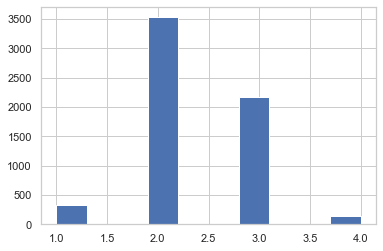

In [29]:
df_dropna['AGE_CAT']=pd.cut(df_dropna['AGE'],
                            bins=[0,25,45,65, np.inf],
                            labels=[1,2,3,4])
df_dropna['AGE_CAT'].hist()

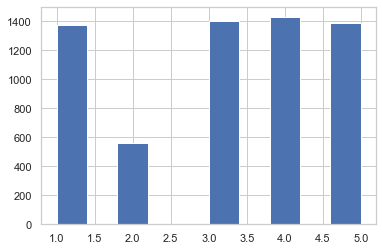

In [30]:
df_dropna['YEARS_OF_ENROLL_CAT']=pd.cut(df_dropna['YEARS_OF_ENROLL'],
                            bins=[-1,5,10,15,20, np.inf],
                            labels=[1,2,3,4,5])
df_dropna['YEARS_OF_ENROLL_CAT'].hist()

In [31]:
df_dropna.groupby('RESPONDENT').mean()

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,GENDER,LANGUAGE,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EMAIL_OPT_IN_FLAG,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,CONTROL_FLAG,AGE,YEARS_OF_ENROLL
RESPONDENT,,,,,,,,,,,,,,,,,
0,1.453868e+10,0.999652,0.37117,0.906511,0.977368,3996.621518,3627.789345,368.832173,45.015669,1.0,575.713788,373.958217,0.405641,0.77977,0.029074,42.440460,13.697772
1,1.439011e+10,1.000000,0.34058,0.893720,0.987923,4313.429952,4002.159420,311.270531,44.082126,1.0,603.601449,390.859903,0.422705,0.73913,0.038647,42.657005,13.500000


In [32]:
df_dropna.groupby('AGE_CAT').mean()

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,GENDER,LANGUAGE,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EMAIL_OPT_IN_FLAG,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,CONTROL_FLAG,AGE,YEARS_OF_ENROLL
AGE_CAT,,,,,,,,,,,,,,,,,,
1,1.437462e+10,1.000000,0.337423,0.874233,0.984663,1176.438650,956.009202,220.429448,55.276074,1.0,286.024540,171.174847,0.239264,0.650307,0.088957,0.033742,21.874233,1.726994
2,1.450843e+10,1.000000,0.351642,0.900623,0.977067,3347.818516,3018.562571,329.255946,45.741789,1.0,483.821348,332.433182,0.373443,0.753681,0.064270,0.032276,37.177520,11.928652
3,1.457991e+10,0.999075,0.401294,0.917707,0.977809,5471.038373,5028.179380,442.858992,42.246879,1.0,754.375405,469.328248,0.478964,0.828479,0.063338,0.025890,52.414239,17.952843
4,1.460886e+10,1.000000,0.386861,0.919708,0.992701,5113.021898,4713.445255,399.576642,42.773723,1.0,897.635036,472.394161,0.525547,0.868613,0.153285,0.014599,70.248175,20.014599


In [33]:
df_dropna.groupby('YEARS_OF_ENROLL_CAT').mean()

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,GENDER,LANGUAGE,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EMAIL_OPT_IN_FLAG,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,CONTROL_FLAG,AGE,YEARS_OF_ENROLL
YEARS_OF_ENROLL_CAT,,,,,,,,,,,,,,,,,,
1,1.452366e+10,1.000000,0.371636,0.917818,0.977455,1732.778182,1408.276364,324.501818,57.047273,1.0,307.722909,236.275636,0.269818,0.680727,0.072000,0.033455,34.186182,2.044364
2,1.471077e+10,1.000000,0.409574,0.874113,0.968085,2965.257092,2732.631206,232.625887,43.386525,1.0,534.907801,313.943262,0.402482,0.778369,0.063830,0.035461,37.923759,8.597518
3,1.448018e+10,0.998571,0.345000,0.852143,0.977143,3567.466429,3225.194286,342.272143,47.714286,1.0,510.788571,365.845714,0.383571,0.757143,0.057857,0.031429,40.487857,13.305000
4,1.444825e+10,1.000000,0.370889,0.925822,0.981106,4385.542337,3988.510147,397.032190,42.456263,1.0,620.009797,375.969209,0.431770,0.825752,0.072078,0.023793,45.294612,18.181945
5,1.459135e+10,1.000000,0.372662,0.939568,0.980576,6781.284892,6332.718705,448.566187,33.410072,1.0,885.529496,545.643885,0.541727,0.841727,0.068345,0.028058,51.535252,23.021583


#### Additional observations
- All sample colletors who responded are having active account
- Colletors who are elder than 65 years old are the most likely to respond (+15%), 8.9% of age group < 25 years old collector responded. 
- Colletors who have enrolled for more than 15 years are more likely to respond 

In [34]:
df_dropna.head()

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,COLLECTOR_TIER,ENROLLMENT_DATE,BIRTHDATE,GENDER,LANGUAGE,HOUSEHOLD_INCOME_CATEGORY,HOME_ADDRESS_CITY,HOME_ADDRESS_PROVINCE_CODE,...,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,DATE_OF_RESPONSE,CONTROL_FLAG,AGE,YEARS_OF_ENROLL,AGE_CAT,YEARS_OF_ENROLL_CAT
0,14089420521,1,O,1997-04-11,1973-06-10,0,1,-1,KESWICK RIDGE,NB,...,1353,1,1,1,2018-02-28,0,43,20,2,4
2,15139470171,1,B,2015-07-14,1996-05-05,0,1,-1,SCARBOROUGH,ON,...,6,0,1,1,2018-02-20,0,21,1,1,1
3,12883629783,1,B,2015-07-14,1996-05-05,0,1,-1,SCARBOROUGH,ON,...,6,0,1,1,2018-02-24,0,21,1,1,1
4,12371682557,1,G,2017-07-26,1978-07-07,0,1,-1,VICTORIA,BC,...,732,0,0,1,2018-02-26,0,38,0,2,1
6,17275436755,1,O,1994-12-08,1973-08-16,0,1,-1,VICTORIA,BC,...,2139,1,1,1,2018-02-22,0,43,22,2,5


## 3.4 Combining Attributes: Populating additional numerical features (POST_1M_EARN_RATIO)

In [35]:
df_dropna['POST_1M_EARN_RATIO']=df_dropna['POST_1M_EARN']/(df_dropna['POST_1M_EARN']+df_dropna['EARN_IN_CAMPAIGN_PERIOD'])

In [36]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 8597
Data columns (total 30 columns):
UNIQUE_COLLECTOR_ID           6158 non-null int64
ACCOUNT_STATUS                6158 non-null int64
COLLECTOR_TIER                6158 non-null category
ENROLLMENT_DATE               6158 non-null datetime64[ns]
BIRTHDATE                     6158 non-null datetime64[ns]
GENDER                        6158 non-null int64
LANGUAGE                      6158 non-null int64
HOUSEHOLD_INCOME_CATEGORY     6158 non-null category
HOME_ADDRESS_CITY             6158 non-null category
HOME_ADDRESS_PROVINCE_CODE    6158 non-null category
HOME_ADDRESS_REGION_CODE      6158 non-null category
PROMO_MAILABLE_FLAG           6158 non-null int64
ACCOUNT_BALANCE               6158 non-null int64
DREAM_ACCOUNT_BALANCE         6158 non-null int64
CASH_ACCOUNT_BALANCE          6158 non-null int64
CASH_RATIO                    6158 non-null int64
LAST_RATIO_CHG_DATE           4422 non-null datetime64[ns]
E

In [37]:
df_dropna.head()

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,COLLECTOR_TIER,ENROLLMENT_DATE,BIRTHDATE,GENDER,LANGUAGE,HOUSEHOLD_INCOME_CATEGORY,HOME_ADDRESS_CITY,HOME_ADDRESS_PROVINCE_CODE,...,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,DATE_OF_RESPONSE,CONTROL_FLAG,AGE,YEARS_OF_ENROLL,AGE_CAT,YEARS_OF_ENROLL_CAT,POST_1M_EARN_RATIO
0,14089420521,1,O,1997-04-11,1973-06-10,0,1,-1,KESWICK RIDGE,NB,...,1,1,1,2018-02-28,0,43,20,2,4,0.263178
2,15139470171,1,B,2015-07-14,1996-05-05,0,1,-1,SCARBOROUGH,ON,...,0,1,1,2018-02-20,0,21,1,1,1,0.206897
3,12883629783,1,B,2015-07-14,1996-05-05,0,1,-1,SCARBOROUGH,ON,...,0,1,1,2018-02-24,0,21,1,1,1,0.206897
4,12371682557,1,G,2017-07-26,1978-07-07,0,1,-1,VICTORIA,BC,...,0,0,1,2018-02-26,0,38,0,2,1,0.829932
6,17275436755,1,O,1994-12-08,1973-08-16,0,1,-1,VICTORIA,BC,...,1,1,1,2018-02-22,0,43,22,2,5,0.456758


In [38]:
# Where to save the figures
#PROJECT_ROOT_DIR = "C:\Users\azhao\Downloads"
#CHAPTER_ID = "Cineplex Case Study"
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

In [39]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<function matplotlib.pyplot.show(*args, **kw)>

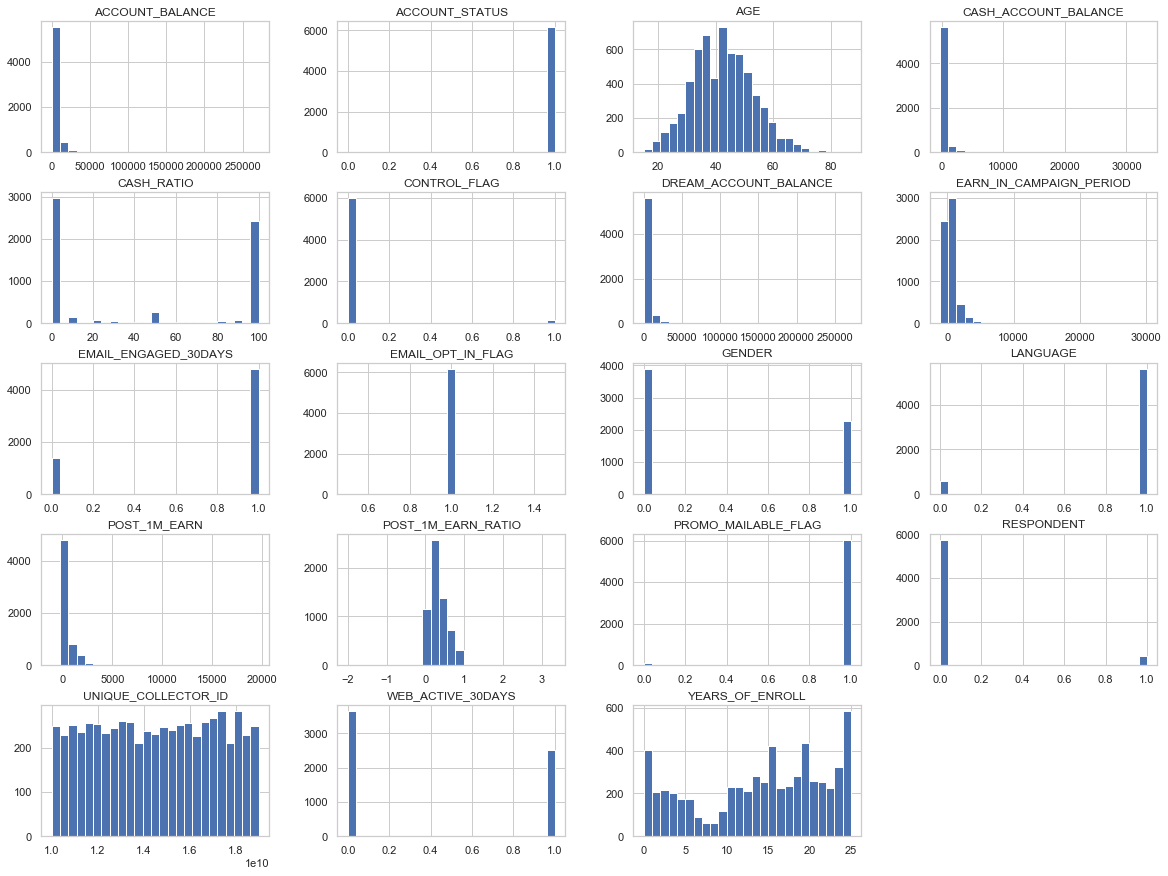

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
df_dropna.hist(bins=25,figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show

In [41]:
df["HOUSEHOLD_INCOME_CATEGORY"].value_counts()

-1    5189
 2     890
 1     684
 0     648
 3     610
 4     577
Name: HOUSEHOLD_INCOME_CATEGORY, dtype: int64

In [42]:
df_dropna["EMAIL_OPT_IN_FLAG"].value_counts()

1    6158
Name: EMAIL_OPT_IN_FLAG, dtype: int64

## 3.5 Checking if Control and Target group has the same audience composition

In [43]:
df_dropna_t=df_dropna[(df_dropna['CONTROL_FLAG'] == 0)]
df_dropna_c=df_dropna[(df_dropna['CONTROL_FLAG'] == 1)]

#### 3.51 COLLECTOR_TIER

In [44]:
df_dropna_t["COLLECTOR_TIER"].value_counts()/len(df_dropna_t)

B    0.502594
G    0.345272
O    0.152134
Name: COLLECTOR_TIER, dtype: float64

In [45]:
df_dropna_c["COLLECTOR_TIER"].value_counts()/len(df_dropna_c)

B    0.524590
G    0.360656
O    0.114754
Name: COLLECTOR_TIER, dtype: float64

#### 3.52 HOUSEHOLD_INCOME_CATEGORY     

In [46]:
df_dropna_t["HOUSEHOLD_INCOME_CATEGORY"].value_counts()/len(df_dropna_t)

-1    0.573724
 2    0.111130
 1    0.081004
 4    0.078661
 0    0.077824
 3    0.077657
Name: HOUSEHOLD_INCOME_CATEGORY, dtype: float64

In [47]:
df_dropna_c["HOUSEHOLD_INCOME_CATEGORY"].value_counts()/len(df_dropna_c)

-1    0.672131
 2    0.103825
 1    0.076503
 0    0.060109
 4    0.049180
 3    0.038251
Name: HOUSEHOLD_INCOME_CATEGORY, dtype: float64

#### Observations:
- 4% difference of composition of Income Category 3: CAD 75K to CAD99,999           


#### 3.53 HOME_ADDRESS_REGION_CODE      

In [48]:
df_dropna_t["HOME_ADDRESS_REGION_CODE"].value_counts()/len(df_dropna_t)

O    0.401339
W    0.330209
A    0.146444
Q    0.122008
Name: HOME_ADDRESS_REGION_CODE, dtype: float64

In [49]:
df_dropna_c["HOME_ADDRESS_REGION_CODE"].value_counts()/len(df_dropna_c)

O    0.415301
W    0.355191
A    0.125683
Q    0.103825
Name: HOME_ADDRESS_REGION_CODE, dtype: float64

In [50]:
#### 3.54 YEARS_OF_ENROLL_CAT

In [51]:
df_dropna_t["YEARS_OF_ENROLL_CAT"].value_counts()/len(df_dropna_t)

4    0.233473
3    0.226946
5    0.226109
1    0.222427
2    0.091046
Name: YEARS_OF_ENROLL_CAT, dtype: float64

In [52]:
df_dropna_c["YEARS_OF_ENROLL_CAT"].value_counts()/len(df_dropna_c)

1    0.251366
3    0.240437
5    0.213115
4    0.185792
2    0.109290
Name: YEARS_OF_ENROLL_CAT, dtype: float64

#### 3.55 AGE_CAT     

In [53]:
df_dropna_t["AGE_CAT"].value_counts()/len(df_dropna_t)

2    0.572050
3    0.352636
1    0.052720
4    0.022594
Name: AGE_CAT, dtype: float64

In [54]:
df_dropna_c["AGE_CAT"].value_counts()/len(df_dropna_c)

2    0.622951
3    0.306011
1    0.060109
4    0.010929
Name: AGE_CAT, dtype: float64

#### 3.56 Others      

In [55]:
df_dropna_t["PROMO_MAILABLE_FLAG"].value_counts()/len(df_dropna_t)     

1    0.978577
0    0.021423
Name: PROMO_MAILABLE_FLAG, dtype: float64

In [56]:
df_dropna_c["PROMO_MAILABLE_FLAG"].value_counts()/len(df_dropna_c)     

1    0.961749
0    0.038251
Name: PROMO_MAILABLE_FLAG, dtype: float64

In [57]:
df_dropna_t["EMAIL_ENGAGED_30DAYS"].value_counts()/len(df_dropna_t)     

1    0.777908
0    0.222092
Name: EMAIL_ENGAGED_30DAYS, dtype: float64

In [58]:
df_dropna_c["EMAIL_ENGAGED_30DAYS"].value_counts()/len(df_dropna_c)    

1    0.748634
0    0.251366
Name: EMAIL_ENGAGED_30DAYS, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

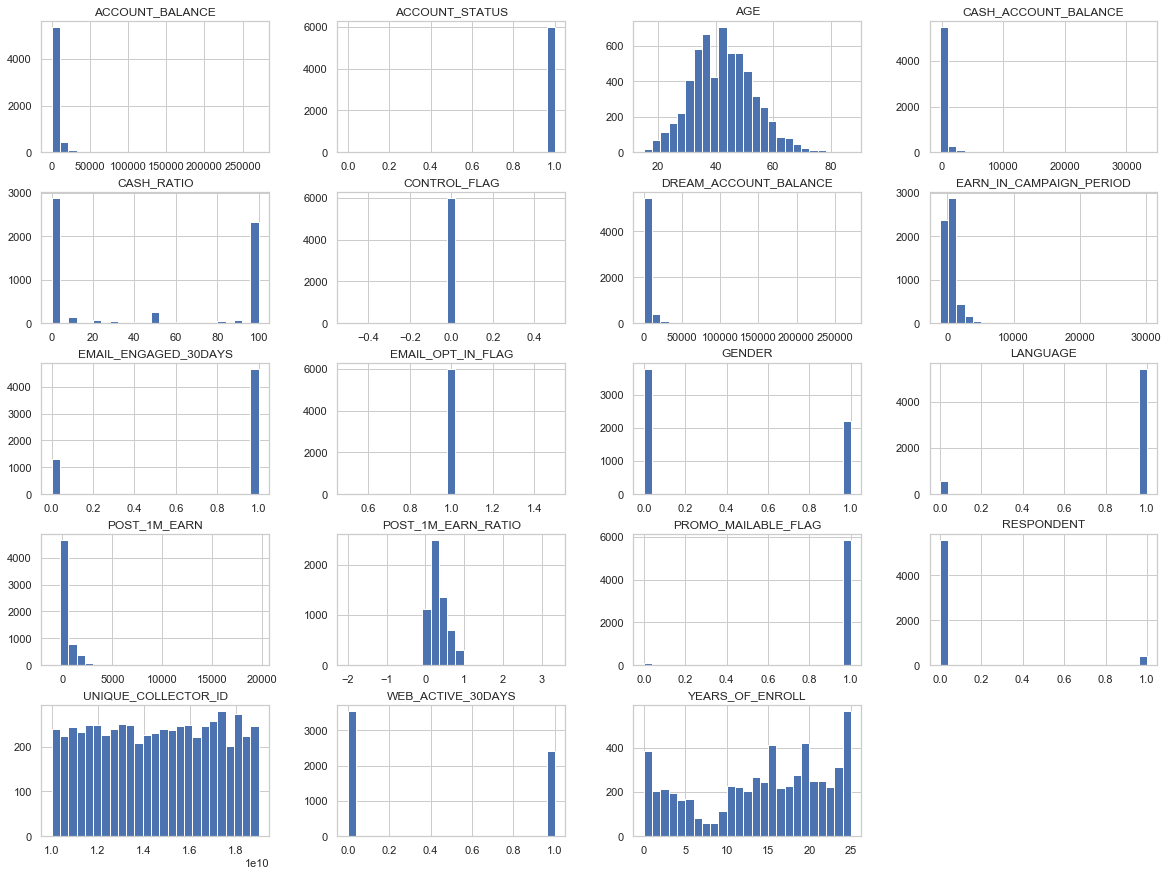

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
df_dropna_t.hist(bins=25,figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show

# 4.Post-campaign Analysis: A/B Testing

## 4.1 A/B Testing for all audience

In [60]:
##Number of respondents before data cleaning:
(zero_t,one_t)=(7756,575)
(zero_c,one_c)=(242,25)
rate_t=round(one_t/(zero_t+one_t),4)
rate_c=round(one_c/(zero_c+one_c),4)
print("Before data cleaning, conversion rate of all audience for control group is {0},for test group is {1}.".format(rate_c, rate_t))
df.groupby(['CONTROL_FLAG','RESPONDENT'])['UNIQUE_COLLECTOR_ID'].count()

Before data cleaning, conversion rate of all audience for control group is 0.0936,for test group is 0.069.


CONTROL_FLAG  RESPONDENT
0             0             7756
              1              575
1             0              242
              1               25
Name: UNIQUE_COLLECTOR_ID, dtype: int64

In [61]:
##Number of respondents after data cleaning:
(zero_t,one_t)=(5577,398)
(zero_c,one_c)=(167,16)
rate_t=round(one_t/(zero_t+one_t),4)
rate_c=round(one_c/(zero_c+one_c),4)
print("Conversion rate of all audience for control group is {0},for test group is {1}.".format(rate_c, rate_t))
df_dropna.groupby(['CONTROL_FLAG','RESPONDENT'])['UNIQUE_COLLECTOR_ID'].count()

Conversion rate of all audience for control group is 0.0874,for test group is 0.0666.


CONTROL_FLAG  RESPONDENT
0             0             5577
              1              398
1             0              167
              1               16
Name: UNIQUE_COLLECTOR_ID, dtype: int64

In [62]:
from scipy.stats import ttest_ind_from_stats,ttest_ind

n_t, n_conv_t = zero_t+one_t,one_t
n_c, n_conv_c = zero_c+one_c,one_c
# Test group 
t = np.zeros(n_t)
t[:n_conv_t] = 1
# Control group
c = np.zeros(n_c)
c[:n_conv_c] = 1
#Stats test
t1, p1 = ttest_ind(t, c)

p1 = 1 - p1/2 if t1 < 0 else p1/2
print('P value of one-tail test is '+ str(p1))

P value of one-tail test is 0.8660131167244486


## 4.2 A/B Testing for males and females

In [63]:
##Number of respondent across genders(females): 
(zero_t,one_t)=(3507,263)
(zero_c,one_c)=(105,10)
rate_t=round(one_t/(zero_t+one_t),4)
rate_c=round(one_c/(zero_c+one_c),4)
print("For females, conversion rate for control group is {0},for test group is {1}.".format(rate_c, rate_t))
df_dropna.groupby(['GENDER','CONTROL_FLAG','RESPONDENT'])['UNIQUE_COLLECTOR_ID'].count()

For females, conversion rate for control group is 0.087,for test group is 0.0698.


GENDER  CONTROL_FLAG  RESPONDENT
0       0             0             3507
                      1              263
        1             0              105
                      1               10
1       0             0             2070
                      1              135
        1             0               62
                      1                6
Name: UNIQUE_COLLECTOR_ID, dtype: int64

In [64]:
from scipy.stats import ttest_ind_from_stats,ttest_ind

n_t, n_conv_t = zero_t+one_t,one_t
n_c, n_conv_c = zero_c+one_c,one_c
# Test group 
t = np.zeros(n_t)
t[:n_conv_t] = 1
# Control group
c = np.zeros(n_c)
c[:n_conv_c] = 1
#Stats test
t1, p1 = ttest_ind(t, c)

p1 = 1 - p1/2 if t1 < 0 else p1/2
print('P value of one-tail test is '+ str(p1))

P value of one-tail test is 0.7612920962629789


In [65]:
##Number of respondent across genders(males): 
(zero_t,one_t)=(2070,135)
(zero_c,one_c)=(62,6)
rate_t=round(one_t/(zero_t+one_t),4)
rate_c=round(one_c/(zero_c+one_c),4)
print("For females, conversion rate for control group is {0},for test group is {1}.".format(rate_c, rate_t))
df_dropna.groupby(['GENDER','CONTROL_FLAG','RESPONDENT'])['UNIQUE_COLLECTOR_ID'].count()

For females, conversion rate for control group is 0.0882,for test group is 0.0612.


GENDER  CONTROL_FLAG  RESPONDENT
0       0             0             3507
                      1              263
        1             0              105
                      1               10
1       0             0             2070
                      1              135
        1             0               62
                      1                6
Name: UNIQUE_COLLECTOR_ID, dtype: int64

In [66]:
from scipy.stats import ttest_ind_from_stats,ttest_ind

n_t, n_conv_t = zero_t+one_t,one_t
n_c, n_conv_c = zero_c+one_c,one_c
# Test group 
t = np.zeros(n_t)
t[:n_conv_t] = 1
# Control group
c = np.zeros(n_c)
c[:n_conv_c] = 1
#Stats test
t1, p1 = ttest_ind(t, c)

p1 = 1 - p1/2 if t1 < 0 else p1/2
print('P value of one-tail test is '+ str(p1))

P value of one-tail test is 0.8183412369406822


## 4.3 A/B Testing across different COLLECTOR_TIER

In [67]:
##Number of respondent across collector_tiers (Blue): 
(zero_t,one_t)=(2806,197)
(zero_c,one_c)=(87,9)
rate_t=round(one_t/(zero_t+one_t),4)
rate_c=round(one_c/(zero_c+one_c),4)
print("For Blue Collectors, conversion rate for control group is {0},for test group is {1}.".format(rate_c, rate_t))
df_dropna.groupby(['COLLECTOR_TIER','CONTROL_FLAG','RESPONDENT'])['UNIQUE_COLLECTOR_ID'].count()

For Blue Collectors, conversion rate for control group is 0.0938,for test group is 0.0656.


COLLECTOR_TIER  CONTROL_FLAG  RESPONDENT
B               0             0             2806
                              1              197
                1             0               87
                              1                9
G               0             0             1918
                              1              145
                1             0               60
                              1                6
O               0             0              853
                              1               56
                1             0               20
                              1                1
Name: UNIQUE_COLLECTOR_ID, dtype: int64

In [68]:
##Number of respondent across collector_tiers (Gold): 
(zero_t,one_t)=(1918,145)
(zero_c,one_c)=(60,6)
rate_t=round(one_t/(zero_t+one_t),4)
rate_c=round(one_c/(zero_c+one_c),4)
print("For Gold Collectors, conversion rate for control group is {0},for test group is {1}.".format(rate_c, rate_t))

For Gold Collectors, conversion rate for control group is 0.0909,for test group is 0.0703.


In [69]:
from scipy.stats import ttest_ind_from_stats,ttest_ind

n_t, n_conv_t = zero_t+one_t,one_t
n_c, n_conv_c = zero_c+one_c,one_c
# Test group 
t = np.zeros(n_t)
t[:n_conv_t] = 1
# Control group
c = np.zeros(n_c)
c[:n_conv_c] = 1
#Stats test
t1, p1 = ttest_ind(t, c)

p1 = 1 - p1/2 if t1 < 0 else p1/2
print('P value of one-tail test is '+ str(p1))

P value of one-tail test is 0.7396078651241138


In [70]:
##Number of respondent across collector_tiers (Onyx): 
(zero_t,one_t)=(853,56)
(zero_c,one_c)=(20,1)
rate_t=round(one_t/(zero_t+one_t),4)
rate_c=round(one_c/(zero_c+one_c),4)
print("For Onyx Collectors, conversion rate for control group is {0},for test group is {1}.".format(rate_c, rate_t))

For Onyx Collectors, conversion rate for control group is 0.0476,for test group is 0.0616.


In [71]:
from scipy.stats import ttest_ind_from_stats,ttest_ind

n_t, n_conv_t = zero_t+one_t,one_t
n_c, n_conv_c = zero_c+one_c,one_c
# Test group 
t = np.zeros(n_t)
t[:n_conv_t] = 1
# Control group
c = np.zeros(n_c)
c[:n_conv_c] = 1
#Stats test
t1, p1 = ttest_ind(t, c)

p1 = 1 - p1/2 if t1 < 0 else p1/2
print('P value of one-tail test is '+ str(p1))

P value of one-tail test is 0.39595169326786556


## 4.4 A/B Testing across different HOME_ADDRESS_REGION

In [72]:
##Number of respondent across HOME_ADDRESS_REGION_CODE (O): 
(zero_t,one_t)=(2236,162)
(zero_c,one_c)=(72,4)
rate_t=round(one_t/(zero_t+one_t),4)
rate_c=round(one_c/(zero_c+one_c),4)
print("For Ontario collectors, conversion rate for control group is {0},for test group is {1}.".format(rate_c, rate_t))
df_dropna.groupby(['HOME_ADDRESS_REGION_CODE','CONTROL_FLAG','RESPONDENT'])['UNIQUE_COLLECTOR_ID'].count()

For Ontario collectors, conversion rate for control group is 0.0526,for test group is 0.0676.


HOME_ADDRESS_REGION_CODE  CONTROL_FLAG  RESPONDENT
A                         0             0              824
                                        1               51
                          1             0               20
                                        1                3
O                         0             0             2236
                                        1              162
                          1             0               72
                                        1                4
Q                         0             0              677
                                        1               52
                          1             0               16
                                        1                3
W                         0             0             1840
                                        1              133
                          1             0               59
                                        1                6
Name:

In [73]:
from scipy.stats import ttest_ind_from_stats,ttest_ind

n_t, n_conv_t = zero_t+one_t,one_t
n_c, n_conv_c = zero_c+one_c,one_c
# Test group 
t = np.zeros(n_t)
t[:n_conv_t] = 1
# Control group
c = np.zeros(n_c)
c[:n_conv_c] = 1
#Stats test
t1, p1 = ttest_ind(t, c)

p1 = 1 - p1/2 if t1 < 0 else p1/2
print('P value of one-tail test is '+ str(p1))

P value of one-tail test is 0.3044131844953638


## 4.4 A/B Testing across different AGE_CAT

In [74]:
##Number of respondent across AGE_CAT_1 (<25 yrs): 
(zero_t,one_t)=(824,51)
(zero_c,one_c)=(20,3)
rate_t=round(one_t/(zero_t+one_t),4)
rate_c=round(one_c/(zero_c+one_c),4)
print("For collectors < 25 yrs, conversion rate for control group is {0},for test group is {1}.".format(rate_c, rate_t))
df_dropna.groupby(['AGE_CAT','CONTROL_FLAG','RESPONDENT'])['UNIQUE_COLLECTOR_ID'].count()

For collectors < 25 yrs, conversion rate for control group is 0.1304,for test group is 0.0583.


AGE_CAT  CONTROL_FLAG  RESPONDENT
1        0             0              287
                       1               28
         1             0               10
                       1                1
2        0             0             3199
                       1              219
         1             0              106
                       1                8
3        0             0             1976
                       1              131
         1             0               50
                       1                6
4        0             0              115
                       1               20
         1             0                1
                       1                1
Name: UNIQUE_COLLECTOR_ID, dtype: int64

# 5. Analysis: Logistic regression

## 5.1 How each attribute correlates with RESPONDENT

In [75]:
corr_matrix=df_dropna.corr()

In [76]:
corr_matrix

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,GENDER,LANGUAGE,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EMAIL_OPT_IN_FLAG,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,CONTROL_FLAG,AGE,YEARS_OF_ENROLL,POST_1M_EARN_RATIO
UNIQUE_COLLECTOR_ID,1.000000,0.017819,0.002339,-0.027061,0.010536,-0.006645,-0.008146,0.009173,0.006074,NaN,-0.023798,-0.016833,-0.003988,0.005475,-0.014282,-0.006543,0.021018,-0.001689,-0.013989
ACCOUNT_STATUS,0.017819,1.000000,-0.023565,-0.005818,0.120394,0.008599,0.008000,0.004779,-0.020941,NaN,0.006894,0.005831,0.014926,-0.009655,0.004839,0.003154,-0.016921,-0.001910,-0.005575
GENDER,0.002339,-0.023565,1.000000,0.041967,0.001908,0.065725,0.056709,0.065577,-0.034077,NaN,0.070348,0.071454,0.022175,0.037831,-0.015874,0.000896,0.047700,-0.009220,0.006645
LANGUAGE,-0.027061,-0.005818,0.041967,1.000000,-0.010384,0.074608,0.078673,-0.019216,-0.148933,NaN,0.057438,0.036823,0.103300,0.027306,-0.010958,0.007413,0.038282,0.049361,0.013425
PROMO_MAILABLE_FLAG,0.010536,0.120394,0.001908,-0.010384,1.000000,0.016012,0.013401,0.018694,0.007224,NaN,0.032105,0.039793,0.044962,0.021049,0.018051,-0.019515,0.002843,0.011156,0.031154
ACCOUNT_BALANCE,-0.006645,0.008599,0.065725,0.074608,0.016012,1.000000,0.988631,0.173748,-0.283265,NaN,0.435047,0.525420,0.242937,0.103056,0.009501,-0.016018,0.149677,0.206345,0.077120
DREAM_ACCOUNT_BALANCE,-0.008146,0.008000,0.056709,0.078673,0.013401,0.988631,1.000000,0.023694,-0.322107,NaN,0.427381,0.508231,0.230427,0.093759,0.011398,-0.017997,0.144354,0.203835,0.061855
CASH_ACCOUNT_BALANCE,0.009173,0.004779,0.065577,-0.019216,0.018694,0.173748,0.023694,1.000000,0.226261,NaN,0.093401,0.164743,0.106053,0.071118,-0.011478,0.011370,0.049725,0.036926,0.107632
CASH_RATIO,0.006074,-0.020941,-0.034077,-0.148933,0.007224,-0.283265,-0.322107,0.226261,1.000000,NaN,-0.198788,-0.181372,-0.185985,-0.050884,-0.004934,0.014000,-0.065527,-0.168747,-0.027045
EMAIL_OPT_IN_FLAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
corr_matrix["RESPONDENT"].sort_values(ascending=False)

RESPONDENT                 1.000000
PROMO_MAILABLE_FLAG        0.018051
CONTROL_FLAG               0.014118
DREAM_ACCOUNT_BALANCE      0.011398
ACCOUNT_BALANCE            0.009501
WEB_ACTIVE_30DAYS          0.008699
POST_1M_EARN               0.006056
EARN_IN_CAMPAIGN_PERIOD    0.005915
POST_1M_EARN_RATIO         0.005422
AGE                        0.005068
ACCOUNT_STATUS             0.004839
CASH_RATIO                -0.004934
YEARS_OF_ENROLL           -0.006437
LANGUAGE                  -0.010958
CASH_ACCOUNT_BALANCE      -0.011478
UNIQUE_COLLECTOR_ID       -0.014282
GENDER                    -0.015874
EMAIL_ENGAGED_30DAYS      -0.024450
EMAIL_OPT_IN_FLAG               NaN
Name: RESPONDENT, dtype: float64

In [78]:
##Alternatively, plot numerical attributes against every other numerical attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017060B11B08>,
      dtype=object)

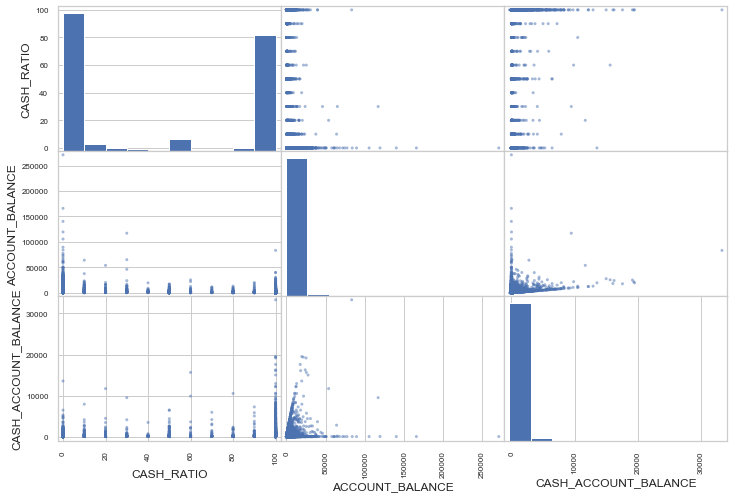

In [79]:
from pandas.plotting import scatter_matrix 
attributes = ["CASH_RATIO","ACCOUNT_BALANCE","CASH_ACCOUNT_BALANCE"]
scatter_matrix(df_dropna[attributes],figsize=(12,8))

In [80]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 8597
Data columns (total 30 columns):
UNIQUE_COLLECTOR_ID           6158 non-null int64
ACCOUNT_STATUS                6158 non-null int64
COLLECTOR_TIER                6158 non-null category
ENROLLMENT_DATE               6158 non-null datetime64[ns]
BIRTHDATE                     6158 non-null datetime64[ns]
GENDER                        6158 non-null int64
LANGUAGE                      6158 non-null int64
HOUSEHOLD_INCOME_CATEGORY     6158 non-null category
HOME_ADDRESS_CITY             6158 non-null category
HOME_ADDRESS_PROVINCE_CODE    6158 non-null category
HOME_ADDRESS_REGION_CODE      6158 non-null category
PROMO_MAILABLE_FLAG           6158 non-null int64
ACCOUNT_BALANCE               6158 non-null int64
DREAM_ACCOUNT_BALANCE         6158 non-null int64
CASH_ACCOUNT_BALANCE          6158 non-null int64
CASH_RATIO                    6158 non-null int64
LAST_RATIO_CHG_DATE           4422 non-null datetime64[ns]
E

In [209]:
df_1 = pd.get_dummies(df_dropna['HOME_ADDRESS_REGION_CODE'], prefix= 'HOME_ADDRESS_REGION_CODE')
df_2 = pd.get_dummies(df_dropna['COLLECTOR_TIER'], prefix='COLLECTOR_TIER')    
df_3 = pd.get_dummies(df_dropna['HOUSEHOLD_INCOME_CATEGORY'], prefix='HOUSEHOLD_INCOME_CATEGORY')     
data = pd.concat([df_dropna, df_1, df_2,df_3], axis=1)
#print (df_dropna.head())
    
cat_vars=['HOME_ADDRESS_REGION_CODE','COLLECTOR_TIER','HOUSEHOLD_INCOME_CATEGORY']
data_vars=data.columns.values.tolist()

data_vars.remove('UNIQUE_COLLECTOR_ID')
data_vars.remove('ENROLLMENT_DATE')
data_vars.remove('ACCOUNT_STATUS')
data_vars.remove('BIRTHDATE')
data_vars.remove('HOME_ADDRESS_CITY')
data_vars.remove('HOME_ADDRESS_PROVINCE_CODE')
data_vars.remove('LAST_RATIO_CHG_DATE')
data_vars.remove('EARN_IN_CAMPAIGN_PERIOD')
data_vars.remove('POST_1M_EARN')
data_vars.remove('DATE_OF_RESPONSE')
data_vars.remove('HOUSEHOLD_INCOME_CATEGORY')
to_keep=[i for i in data_vars if i not in cat_vars]

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6158 entries, 0 to 8597
Data columns (total 38 columns):
UNIQUE_COLLECTOR_ID             6158 non-null int64
ACCOUNT_STATUS                  6158 non-null int64
COLLECTOR_TIER                  6158 non-null category
ENROLLMENT_DATE                 6158 non-null datetime64[ns]
BIRTHDATE                       6158 non-null object
GENDER                          6158 non-null int64
LANGUAGE                        6158 non-null int64
HOUSEHOLD_INCOME_CATEGORY       6158 non-null category
HOME_ADDRESS_CITY               6158 non-null category
HOME_ADDRESS_PROVINCE_CODE      6158 non-null category
HOME_ADDRESS_REGION_CODE        6158 non-null category
PROMO_MAILABLE_FLAG             6158 non-null int64
ACCOUNT_BALANCE                 6158 non-null int64
DREAM_ACCOUNT_BALANCE           6158 non-null int64
CASH_ACCOUNT_BALANCE            6158 non-null int64
CASH_RATIO                      6158 non-null int64
LAST_RATIO_CHG_DATE             4422

In [211]:
to_keep

['GENDER',
 'LANGUAGE',
 'PROMO_MAILABLE_FLAG',
 'ACCOUNT_BALANCE',
 'DREAM_ACCOUNT_BALANCE',
 'CASH_ACCOUNT_BALANCE',
 'CASH_RATIO',
 'EMAIL_OPT_IN_FLAG',
 'WEB_ACTIVE_30DAYS',
 'EMAIL_ENGAGED_30DAYS',
 'RESPONDENT',
 'CONTROL_FLAG',
 'HOME_ADDRESS_REGION_CODE_A',
 'HOME_ADDRESS_REGION_CODE_O',
 'HOME_ADDRESS_REGION_CODE_Q',
 'HOME_ADDRESS_REGION_CODE_W',
 'COLLECTOR_TIER_B',
 'COLLECTOR_TIER_G',
 'COLLECTOR_TIER_O',
 'HOUSEHOLD_INCOME_CATEGORY_-1',
 'HOUSEHOLD_INCOME_CATEGORY_0',
 'HOUSEHOLD_INCOME_CATEGORY_1',
 'HOUSEHOLD_INCOME_CATEGORY_2',
 'HOUSEHOLD_INCOME_CATEGORY_3',
 'HOUSEHOLD_INCOME_CATEGORY_4']

In [212]:
data_final=data[to_keep]
data_final.columns.values

array(['GENDER', 'LANGUAGE', 'PROMO_MAILABLE_FLAG', 'ACCOUNT_BALANCE',
       'DREAM_ACCOUNT_BALANCE', 'CASH_ACCOUNT_BALANCE', 'CASH_RATIO',
       'EMAIL_OPT_IN_FLAG', 'WEB_ACTIVE_30DAYS', 'EMAIL_ENGAGED_30DAYS',
       'RESPONDENT', 'CONTROL_FLAG', 'HOME_ADDRESS_REGION_CODE_A',
       'HOME_ADDRESS_REGION_CODE_O', 'HOME_ADDRESS_REGION_CODE_Q',
       'HOME_ADDRESS_REGION_CODE_W', 'COLLECTOR_TIER_B',
       'COLLECTOR_TIER_G', 'COLLECTOR_TIER_O',
       'HOUSEHOLD_INCOME_CATEGORY_-1', 'HOUSEHOLD_INCOME_CATEGORY_0',
       'HOUSEHOLD_INCOME_CATEGORY_1', 'HOUSEHOLD_INCOME_CATEGORY_2',
       'HOUSEHOLD_INCOME_CATEGORY_3', 'HOUSEHOLD_INCOME_CATEGORY_4'],
      dtype=object)

## 5.2 Over-sampling using SMOTE

In [84]:
!pip install imblearn

In [213]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [214]:
import tensorflow as tf

In [215]:
X = data_final.loc[:, data_final.columns != 'RESPONDENT']
y = data_final.loc[:, data_final.columns == 'RESPONDENT']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, np.ravel(y_train))
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no respondent data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of respondent data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  8040
Number of no subscription in oversampled data 4020
Number of subscription 4020
Proportion of no respondent data in oversampled data is  0.5
Proportion of respondent data in oversampled data is  0.5


In [223]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 7)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

C:\Users\azhao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\azhao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

[False False False  True  True  True False False False False False  True
 False False False  True  True  True False False False False False False]
[13 17  7  1  1  1 18  4 16 14 15  1  3  5  2  1  1  1 11 12 10  6  8  9]


C:\Users\azhao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\azhao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

In [222]:
data_final_vars

['GENDER',
 'LANGUAGE',
 'PROMO_MAILABLE_FLAG',
 'ACCOUNT_BALANCE',
 'DREAM_ACCOUNT_BALANCE',
 'CASH_ACCOUNT_BALANCE',
 'CASH_RATIO',
 'EMAIL_OPT_IN_FLAG',
 'WEB_ACTIVE_30DAYS',
 'EMAIL_ENGAGED_30DAYS',
 'RESPONDENT',
 'CONTROL_FLAG',
 'HOME_ADDRESS_REGION_CODE_A',
 'HOME_ADDRESS_REGION_CODE_O',
 'HOME_ADDRESS_REGION_CODE_Q',
 'HOME_ADDRESS_REGION_CODE_W',
 'COLLECTOR_TIER_B',
 'COLLECTOR_TIER_G',
 'COLLECTOR_TIER_O',
 'HOUSEHOLD_INCOME_CATEGORY_-1',
 'HOUSEHOLD_INCOME_CATEGORY_0',
 'HOUSEHOLD_INCOME_CATEGORY_1',
 'HOUSEHOLD_INCOME_CATEGORY_2',
 'HOUSEHOLD_INCOME_CATEGORY_3',
 'HOUSEHOLD_INCOME_CATEGORY_4']

The RFE has helped us select the above 7 features 

In [224]:
#I remove 'COLLECTOR_TIER_B',replace ACCOUNT_BALANCE by CONTROL_FLAG
cols=['DREAM_ACCOUNT_BALANCE','CONTROL_FLAG', 'CASH_ACCOUNT_BALANCE','HOME_ADDRESS_REGION_CODE_A', 'COLLECTOR_TIER_G', 'COLLECTOR_TIER_O'] 
X=os_data_X[cols]
y=os_data_y['y']

In [225]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.631464
         Iterations 6
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.089      
Dependent Variable:    y                   AIC:                 10165.9345 
Date:                  2020-02-09 22:23    BIC:                 10207.8876 
No. Observations:      8040                Log-Likelihood:      -5077.0    
Df Model:              5                   LL-Null:             -5572.9    
Df Residuals:          8034                LLR p-value:         3.4556e-212
Converged:             1.0000              Scale:               1.0000     
No. Iterations:        6.0000                                              
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
DREAM_ACCOUNT_BAL

## 5.3 Model fitting

In [226]:
##Model fitting 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [227]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


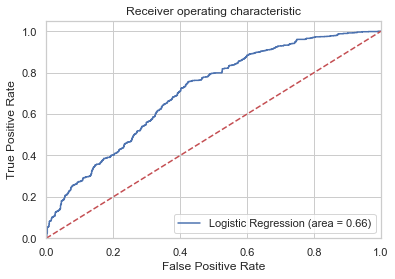

In [228]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 5.4 Evaluating model performance

#### RMSE

In [229]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [230]:
respondent_predictions = logreg.predict(X_train)
mse = mean_squared_error(y_train, respondent_predictions)
rmse = np.sqrt(mse)

# Estimation for test
test_predictions = logreg.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
print("Train RMSE: %.3f \n Test RMSE: %.3f" %(rmse, test_rmse) )

Train RMSE: 0.587 
 Test RMSE: 0.585


#### Confusion Matrix

In [231]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[658 536]
 [289 929]]


The result is telling us that we have 658+929 correct predictions and 536+289 incorrect predictions.